In [ ]:
from google.cloud import bigquery
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 設置服務帳戶憑據
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "final-445615-7590bb2d51fb.json"

# 初始化 BigQuery 客戶端
client = bigquery.Client()

# 執行查詢並直接轉為 DataFrame
query = """
SELECT 
    answer_score, 
    answer_comment_count, 
    answerer_reputation,
    user_tenure_seconds,
    answerer_up_votes,
    answerer_down_votes,
    classification_label
FROM `final-445615.ml_data.1231_sample30`
"""
print("Running BigQuery query...")
query_job = client.query(query)
rows = [dict(row) for row in query_job.result()]  # 將結果轉為列表
full_df = pd.DataFrame(rows)  # 將結果轉為 DataFrame
print("Query completed. Data loaded into DataFrame.")

In [ ]:


# 選擇特徵和目標欄位
features = ["answer_score", "answer_comment_count", "answerer_reputation",
            "user_tenure_seconds", "answerer_up_votes", "answerer_down_votes"]
target = "classification_label"

# 分離特徵與目標
X = full_df[features]
y = full_df[target]

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化數據
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 初始化分類模型
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# 訓練模型
print("Training the model...")
clf.fit(X_train, y_train)

# 測試模型
y_pred = clf.predict(X_test)

# 評估模型
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Running BigQuery query...
Query completed. Data loaded into DataFrame.
Training the model...
Accuracy: 0.6368008095263006
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59    581020
           1       0.66      0.69      0.68    699729

    accuracy                           0.64   1280749
   macro avg       0.63      0.63      0.63   1280749
weighted avg       0.64      0.64      0.64   1280749



In [12]:
from google.cloud import bigquery
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# 設置服務帳戶憑據
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "final-445615-7590bb2d51fb.json"

# 初始化 BigQuery 客戶端
client = bigquery.Client()


# 初始化分類模型（使用 LightGBM）
clf = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)

# 訓練模型
print("Training the model...")
clf.fit(X_train, y_train)

# 測試模型
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # 獲取概率分數，用於 AUC 計算

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Training the model...


c:\Users\Ella\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2793040, number of negative: 2329954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 5122994, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545197 -> initscore=0.181282
[LightGBM] [Info] Start training from score 0.181282


c:\Users\Ella\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ella\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.6551861449823502
ROC AUC Score: 0.7082669610834553
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.55      0.59    581020
           1       0.67      0.74      0.70    699729

    accuracy                           0.66   1280749
   macro avg       0.65      0.65      0.65   1280749
weighted avg       0.65      0.66      0.65   1280749

Confusion Matrix:
 [[320857 260163]
 [181457 518272]]


# XGB

In [14]:
from google.cloud import bigquery
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# 設置服務帳戶憑據
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "final-445615-7590bb2d51fb.json"

# 初始化 BigQuery 客戶端
client = bigquery.Client()

# 加載數據並進行處理（假設已經有 X 和 y）
# 對特徵進行縮放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 初始化分類模型（使用 XGBoost）
clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=12,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 訓練模型
print("Training the model...")
clf.fit(X_train, y_train)

# 測試模型
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # 獲取概率分數，用於 AUC 計算

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Training the model...


c:\Users\Ella\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6635728165245015
ROC AUC Score: 0.7212223965806195
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60    873292
           1       0.67      0.75      0.71   1047831

    accuracy                           0.66   1921123
   macro avg       0.66      0.66      0.66   1921123
weighted avg       0.66      0.66      0.66   1921123

Confusion Matrix:
 [[492201 381091]
 [265227 782604]]


# 多模型比較
### 模型：
1. Logistic Regression
2. Random Forest
3. Gradient Boosting (XGBoost)
4. LightGBM

Training Logistic Regression...
Logistic Regression Confusion Matrix:
 [[450677 422615]
 [351181 696650]]
Training Random Forest...
Random Forest Confusion Matrix:
 [[467431 405861]
 [263428 784403]]
Training XGBoost...
XGBoost Confusion Matrix:
 [[492201 381091]
 [265227 782604]]
Training LightGBM...


c:\Users\Ella\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2444938, number of negative: 2037682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 4482620, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545426 -> initscore=0.182207
[LightGBM] [Info] Start training from score 0.182207


c:\Users\Ella\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ella\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Confusion Matrix:
 [[480916 392376]
 [270519 777312]]


<Figure size 1200x600 with 0 Axes>

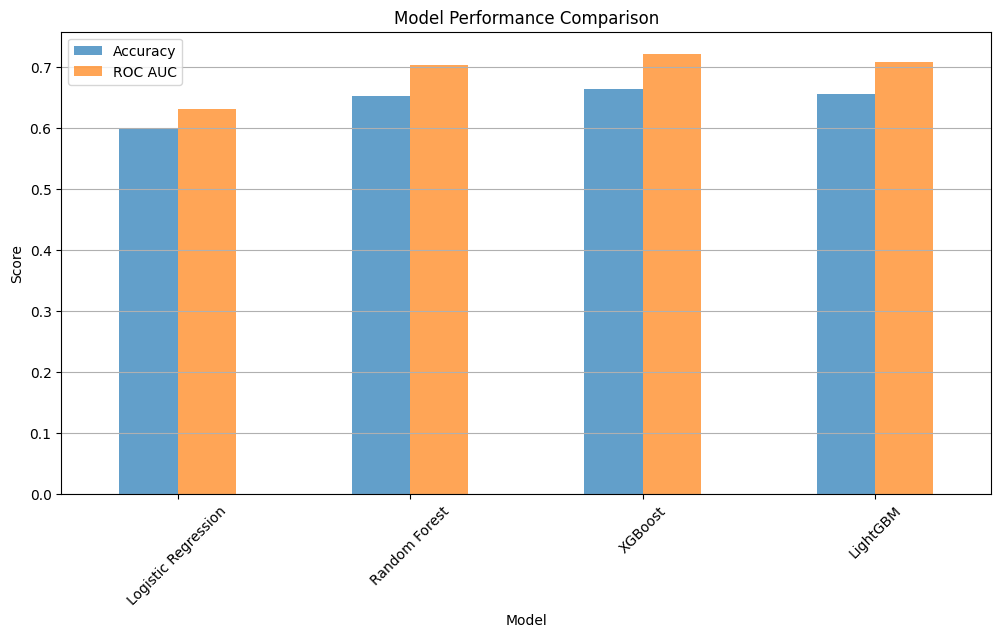

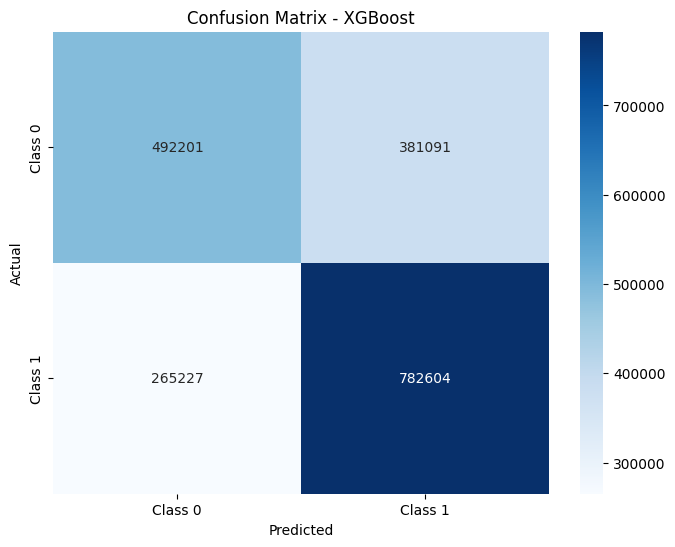

Performance Summary:
                 Model  Accuracy   ROC AUC  Precision (1)  Recall (1)  \
0  Logistic Regression  0.597217  0.630598       0.622417    0.664850   
1        Random Forest  0.651616  0.702451       0.659016    0.748597   
2              XGBoost  0.663573  0.721222       0.672516    0.746880   
3             LightGBM  0.654944  0.707818       0.664546    0.741830   

   F1-Score (1)  
0      0.642934  
1      0.700956  
2      0.707750  
3      0.701065  


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    confusion_matrix
)

# 模型列表
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=12, subsample=0.8, colsample_bytree=0.8, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=12, random_state=42)
}

# 儲存結果
results = []

# 訓練和測試每個模型
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 計算指標
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # 儲存結果
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC AUC": roc_auc,
        "Precision (1)": report["1"]["precision"],
        "Recall (1)": report["1"]["recall"],
        "F1-Score (1)": report["1"]["f1-score"]
    })
    
    # 混淆矩陣
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n", conf_matrix)

# 將結果轉為 DataFrame
results_df = pd.DataFrame(results)

# 視覺化結果
plt.figure(figsize=(12, 6))

# Accuracy 和 ROC AUC 條形圖
results_df.plot(x="Model", y=["Accuracy", "ROC AUC"], kind="bar", figsize=(12, 6), alpha=0.7)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 混淆矩陣熱圖（以最佳模型為例）
best_model_name = results_df.sort_values(by="ROC AUC", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 顯示結果
print("Performance Summary:")
print(results_df)


# full data

In [21]:
from google.cloud import bigquery
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 設置服務帳戶憑據
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "final-445615-7590bb2d51fb.json"

# 初始化 BigQuery 客戶端
client = bigquery.Client()

# 執行查詢並直接轉為 DataFrame
query = """
SELECT 
    answer_score, 
    answer_comment_count, 
    answerer_reputation,
    user_tenure_seconds,
    answerer_up_votes,
    answerer_down_votes,
    classification_label
FROM `final-445615.ml_data.1231_full`
"""
print("Running BigQuery query...")
query_job = client.query(query)
rows = [dict(row) for row in query_job.result()]  # 將結果轉為列表
df = pd.DataFrame(rows)  # 將結果轉為 DataFrame
print("Query completed. Data loaded into DataFrame.")

Running BigQuery query...
Query completed. Data loaded into DataFrame.


DataFrame after removing missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21342975 entries, 0 to 21342974
Data columns (total 7 columns):
 #   Column                Dtype
---  ------                -----
 0   answer_score          int64
 1   answer_comment_count  int64
 2   answerer_reputation   int64
 3   user_tenure_seconds   int64
 4   answerer_up_votes     int64
 5   answerer_down_votes   int64
 6   classification_label  int64
dtypes: int64(7)
memory usage: 1.1 GB
None
Training the model...
Accuracy: 0.6519068802180514
ROC AUC Score: 0.7023891948680931
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.53      0.58   2910467
           1       0.66      0.75      0.70   3492426

    accuracy                           0.65   6402893
   macro avg       0.65      0.64      0.64   6402893
weighted avg       0.65      0.65      0.65   6402893

Confusion Matrix:
 [[1555036 1355431]
 [ 873372 2619054]]


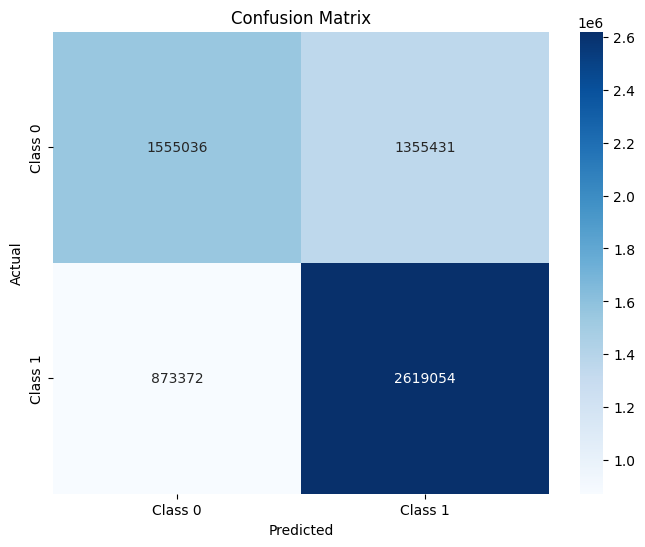

In [22]:
# 處理缺失值（移除或填補）
df = df.dropna()  # 移除缺失值
print("DataFrame after removing missing values:")
print(df.info())

# 特徵與標籤
X = df.drop(columns=["classification_label"])  # 特徵
y = df["classification_label"]  # 標籤

# 數據分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 特徵縮放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化隨機森林分類器
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 訓練模型
print("Training the model...")
clf.fit(X_train_scaled, y_train)

# 測試模型
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]  # 獲取概率分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 視覺化混淆矩陣
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()